# Convolutional Neural Network (CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint


# Load the Data

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

# Prepare the data

## 1. Reshape the image to cover the pixels size and also the channels

In [3]:
x_train = x_train.reshape( -1 , 28, 28, 1)
x_test = x_test.reshape( -1 , 28, 28, 1)


## 2. Scale the inputs from values 0-255 ---> 0-1

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## 3. Prepare the labels -> One Hot encoding


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Create the model

In [18]:
model = Sequential() 


# Add the Convolutional Part
#~~~~~~~~~~~~~~~~~~~~~
# Conv1
model.add( Conv2D(32, kernel_size =(3,3) , strides =(1,1) , activation= "relu", padding = "same",  input_shape = (28,28,1) )  )
model.add( MaxPooling2D(pool_size=(2,2), strides = (2,2) ))

# Conv2
model.add( Conv2D(64 , kernel_size =(3,3) , strides =(1,1) ,padding = "same", activation= "relu" )  )
model.add( MaxPooling2D(pool_size=(2,2), strides = (2,2) ))

model.add(Flatten()) # input layer for NN

# Add the NN Part
#~~~~~~~~~~~~~~~~~~~~~
model.add(Dense(128, activation= "relu")) # Hidden layer with 128

model.add(Dropout(0.2) ) # Drop out Layer

model.add(Dense(10, activation= "softmax")) # Output layer



In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Callbacks

In [10]:
# Custom Call Back
# Aufgabe: replace the prints with the customized logger

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))


In [23]:
my_callback_list = [
    EarlyStopping(patience=5 ,  min_delta=0.0001),
    CSVLogger("./training_cnn.log"),
    ModelCheckpoint(filepath="./models/cnn_{epoch:02d}_{val_loss:.2f}.keras"),
    # MyCustomCallback()    
    
]

# Train the model

In [12]:
LEARNING_RATE = 0.001
EPOCHS = 10

# Compile/configure the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE) , loss = "categorical_crossentropy", metrics= ["accuracy"]   )

# Train the model
history = model.fit(x_train, y_train, batch_size = 128,  epochs= EPOCHS, validation_data=(x_test, y_test), callbacks= my_callback_list)


Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
Epoch 1/10
...Training: start of batch 0; got log keys: []


...Training: end of batch 0; got log keys: ['loss', 'accuracy']
  1/469 [..............................] - ETA: 15:57 - loss: 2.2985 - accuracy: 0.0703...Training: start of batch 1; got log keys: []
...Training: end of batch 1; got log keys: ['loss', 'accuracy']
  2/469 [..............................] - ETA: 23s - loss: 2.2622 - accuracy: 0.1445  ...Training: start of batch 2; got log keys: []
...Training: end of batch 2; got log keys: ['loss', 'accuracy']
...Training: start of batch 3; got log keys: []
...Training: end of batch 3; got log keys: ['loss', 'accuracy']
  4/469 [..............................] - ETA: 20s - loss: 2.1955 - accuracy: 0.2578...Training: start of batch 4; got log keys: []
...Training: end of batch 4; got log keys: ['loss', 'accuracy']
...Training: start of batch 5; got log keys: []
...Training: end of batch 5; got log key

# Visualize the results

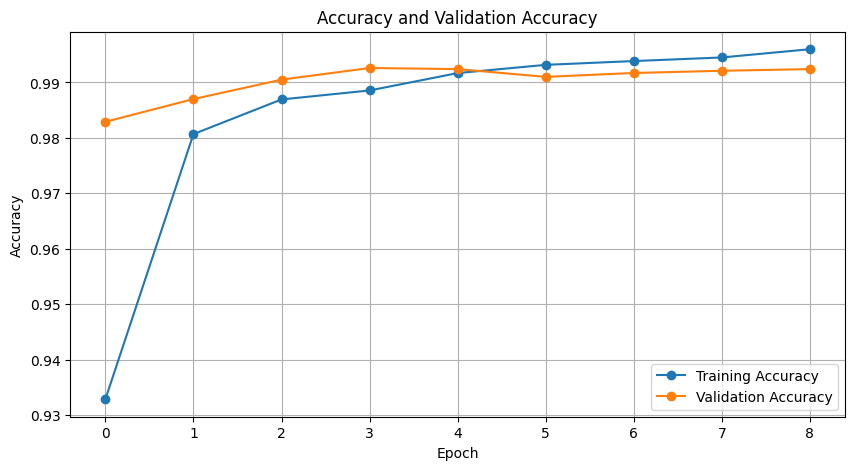

In [13]:
# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualize the model Architecture

In [20]:
from keras_visualizer import visualizer

visualizer(model, file_name= "./cnn_mnist_network", file_format= "pdf")

In [21]:
import visualkeras

visualkeras.layered_view(model, to_file='output.png').show()

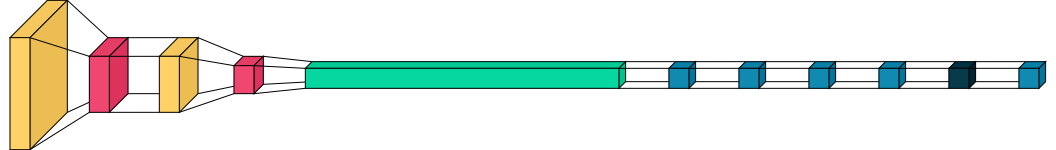

In [22]:
visualkeras.layered_view(model, spacing=50)